# Hotel Booking Analysis

Business Case Questions To Answer
- Which country do most travellers come from? List the 5 countries with the most passengers.
- Who has the most ADR? How much?
- Specify the mean of the total ADR? (two decimal places)
- Specify the average number of nights spend. (two decimal places)
- Who has booked the hotel with the most children and babies?
- And any other 3 business case questions of your own?
- Which customer type was most frequent at the hotel?
- What revenue was generated by the customer group?
- What customer group canceled bookings most? 

### Steps

import libraries

load dataset

perform eda to answer the questions

prepare the report

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import country_converter as coco

#### Load Dataset

In [22]:
df = pd.read_csv('dataset/Hotel bookings.csv')

In [23]:
# Dataset head
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01/07/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02/07/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [24]:
# check empty values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [25]:
# descriptive statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [26]:
# ascertain datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Data Preprocessing 

In [27]:
# drop agent and company features because these features were not defined in the data dictionery
df.drop(['company', 'agent'], axis = 1, inplace = True)

In [28]:
# missing values in country
countries = list(df['country'].unique())

In [29]:
idx = list(df[df['country'].apply(lambda x :type(x) == float) == True].index)

df.drop(idx, axis = 0, inplace = True)

In [30]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [31]:
# What Different Types Of Customers Exist?
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Which country do most travellers come from? List the 5 countries with the most passengers

In [32]:
# group dataframe using the country. and count each the occurrences of each country
country = df.groupby(by = 'country', sort = True).count()
# sort the values by hotel. Note: All columns have same  value or number of entries
# so, any column name would work same

num_top_countries = 5
top_country_short = country.sort_values(by='hotel', ascending=False)[:num_top_countries].index

In [33]:
top_visiting_countries = {coco.convert(names=c, to='name_short') : country.loc[c]['hotel'] for c in top_country_short}

In [47]:
data = {
    'country': list(top_visiting_countries.keys()), 
    'visit count': list(top_visiting_countries.values())}
top_visiting_countries_df = pd.DataFrame(data=data, index=range(len(top_visiting_countries)))
top_visiting_countries_df

,country,visit count
0,Portugal,48590
1,United Kingdom,12129
2,France,10415
3,Spain,8568
4,Germany,7287


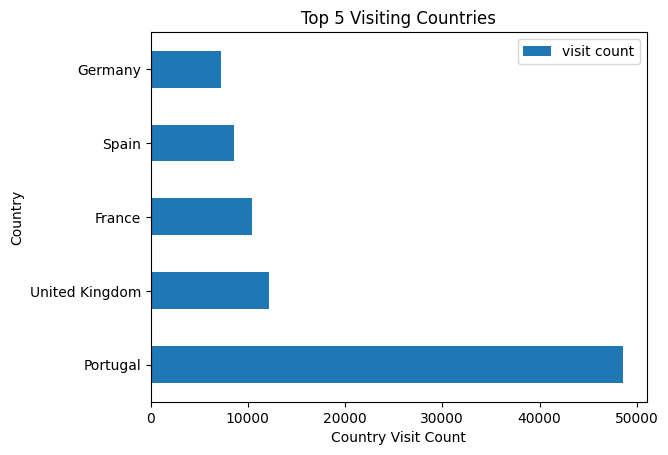

In [82]:
# plt.bar(x = top_visiting_countries_df['country'], y = top_visiting_countries_df['visit count'], height = 50)
top_visiting_countries_df.plot.barh(x = 'country', y = 'visit count')
plt.xlabel('Country Visit Count')
plt.ylabel('Country')
plt.title(f"Top {num_top_countries} Visiting Countries")
plt.show()

Who has the most ADR? How much?

In [88]:
# ADR : Average Daily Rate as defined by dividing the sum of all lodging 
# transactions by the total number of staying nights